<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/SupportVectorMachineROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

**Importing Dataset**

In [ ]:
#Importing the data file in dataframe formate
data=pd.read_csv('/content/placement.csv')
print(data)

           city  cgpa     iq work_experience  placement
0      New York   6.8  123.0              No          1
1   Los Angeles   5.9  106.0             Yes          0
2       Chicago   NaN  121.0              No          0
3      New York   7.4  132.0              No          1
4   Los Angeles   5.8  142.0              No          0
..          ...   ...    ...             ...        ...
95      Chicago   4.3  200.0             Yes          0
96     New York   4.4   42.0             Yes          0
97  Los Angeles   6.7  182.0              No          1
98      Chicago   6.3  103.0              No          1
99     New York   6.2  113.0              No          1

[100 rows x 5 columns]


# **Linear SVM (2D Dataset)**

>Tuning Dataset

In [ ]:
data.head(10)

,city,cgpa,iq,work_experience,placement
0,New York,6.8,123.0,No,1
1,Los Angeles,5.9,106.0,Yes,0
2,Chicago,NaN,121.0,No,0
3,New York,7.4,132.0,No,1
4,Los Angeles,5.8,142.0,No,0
5,Chicago,7.1,48.0,Yes,1
6,New York,5.7,NaN,No,0
7,Los Angeles,5.0,63.0,Yes,0
8,Chicago,6.1,156.0,No,0
9,New York,5.1,66.0,No,0


In [ ]:
data.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


**Data Preprocessing**

In [ ]:
data.isnull().sum()

city               0
cgpa               8
iq                 4
work_experience    0
placement          0
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
#filling missing value with mean

#first calculate the mean value
mean_val1=data['cgpa'].mean()
print(mean_val1)
mean_val=data['iq'].mean()
print(mean_val)
#code to fill the mean value in the empty column
data.fillna(data['cgpa'].mean(),inplace=True)
data.fillna(data['iq'].mean(),inplace=True)
print(data)

5.965217391304349
117.91666666666667
           city      cgpa     iq work_experience  placement
0      New York  6.800000  123.0              No          1
1   Los Angeles  5.900000  106.0             Yes          0
2       Chicago  5.965217  121.0              No          0
3      New York  7.400000  132.0              No          1
4   Los Angeles  5.800000  142.0              No          0
..          ...       ...    ...             ...        ...
95      Chicago  4.300000  200.0             Yes          0
96     New York  4.400000   42.0             Yes          0
97  Los Angeles  6.700000  182.0              No          1
98      Chicago  6.300000  103.0              No          1
99     New York  6.200000  113.0              No          1

[100 rows x 5 columns]


In [ ]:
#performing the labelencoding for the categorical data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.columns:
    if data['work_experience'].dtype == 'object':
        label_encoders['work_experience'] = LabelEncoder()

# Fit and transform each categorical column
for column, encoder in label_encoders.items():
    data['work_experience'] = encoder.fit_transform(data['work_experience'])
print(data)

           city      cgpa     iq  work_experience  placement
0      New York  6.800000  123.0                0          1
1   Los Angeles  5.900000  106.0                1          0
2       Chicago  5.965217  121.0                0          0
3      New York  7.400000  132.0                0          1
4   Los Angeles  5.800000  142.0                0          0
..          ...       ...    ...              ...        ...
95      Chicago  4.300000  200.0                1          0
96     New York  4.400000   42.0                1          0
97  Los Angeles  6.700000  182.0                0          1
98      Chicago  6.300000  103.0                0          1
99     New York  6.200000  113.0                0          1

[100 rows x 5 columns]


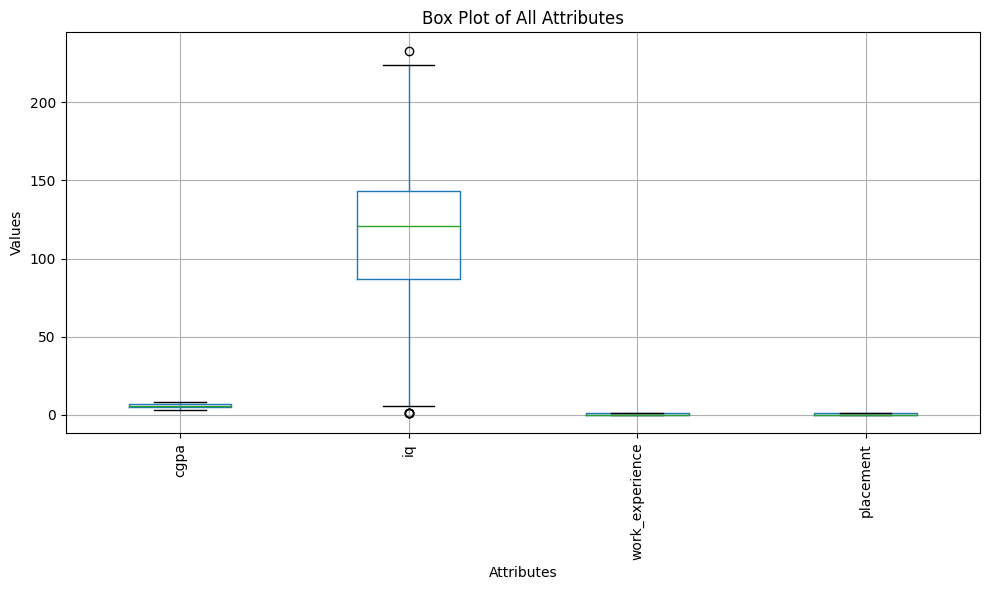

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
import scipy.stats as stats
z_scores_iq = np.abs(stats.zscore(data['iq']))

# Define threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Filter out rows with outlier IQ scores
data_no_outliers = data[(z_scores_iq <= threshold)]
print(data_no_outliers)

           city      cgpa     iq  work_experience  placement
0      New York  6.800000  123.0                0          1
1   Los Angeles  5.900000  106.0                1          0
2       Chicago  5.965217  121.0                0          0
3      New York  7.400000  132.0                0          1
4   Los Angeles  5.800000  142.0                0          0
..          ...       ...    ...              ...        ...
95      Chicago  4.300000  200.0                1          0
96     New York  4.400000   42.0                1          0
97  Los Angeles  6.700000  182.0                0          1
98      Chicago  6.300000  103.0                0          1
99     New York  6.200000  113.0                0          1

[100 rows x 5 columns]


**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'target_column' is the column you want to predict
# Define all feature names in a list
feature_names = ['cgpa','iq','work_experience']

X=data_no_outliers[feature_names]

y = data_no_outliers['placement'] # Target variable
#spliting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a Linear SVM Model**

In [ ]:
#fitting data to SVM
model=svm.SVC(kernel='linear',C=1.0)
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#printing the accuracy using score function
print(f"Accuracy : {(model.score(X_test,y_test))*100} %")

Accuracy : 90.0 %


In [ ]:
#make predictions on test set
y_pred=model.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0]


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9


In [ ]:
#displaying classification report
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



**Visualization**

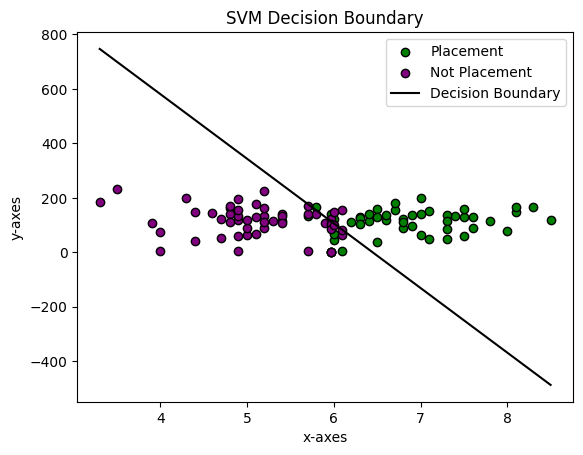

In [ ]:
#splitting binary result for plotting
placement_data = data[data_no_outliers["placement"] == 1]
not_placement_data = data[data_no_outliers["placement"] == 0]
#plotting datapoints
plt.scatter(placement_data["cgpa"], placement_data["iq"], color='green', edgecolors='k', label='Placement')
plt.scatter(not_placement_data["cgpa"], not_placement_data["iq"], color='purple', edgecolors='k', label='Not Placement')

#extracting values of decision boundary
w = model.coef_[0]
a = -w[0] / w[1]  # slope of the decision boundary
xx = np.linspace(data_no_outliers["cgpa"].min(), data_no_outliers["cgpa"].max())
yy = a * xx - (model.intercept_[0]) / w[1]  # equation of the decision boundary

# Plotting decision boundary
plt.plot(xx, yy, 'k-', label='Decision Boundary')

#plotting labels
plt.xlabel('x-axes')
plt.ylabel('y-axes')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

**Confusion Matrix**

Confusion matrix

 [[10  0]
 [ 2  8]]

True Positives(TP) =  10

True Negatives(TN) =  8

False Positives(FP) =  0

False Negatives(FN) =  2


<Axes: >

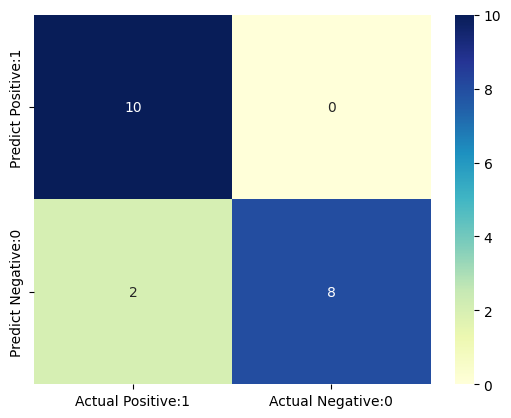

In [ ]:
from sklearn.metrics import confusion_matrix
#calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
#displaying values of confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
#plotting confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



###  ROC-AUC - (Receiver Operating Characteristic Curve )


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Define the linear SVC
linear_svc = SVC(kernel='linear')

# Train your linear SVC model using X_train and y_train
linear_svc.fit(X_train, y_train)

# Calculate ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Calculate cross-validated ROC AUC
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


ROC AUC : 0.9000
Cross validated ROC AUC : 0.9608


**Visualization**

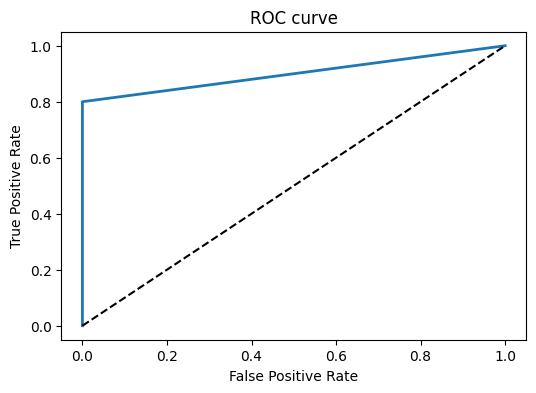

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### **Stratified k-Fold Cross Validation with shuffle split with linear kerne**l

In [ ]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))


Stratified cross-validation scores with linear kernel:

[0.85 0.8  1.   0.85 0.95]
Average stratified cross-validation score with linear kernel:0.8900


**Hyper Parameter Tuning Using Grid Search**


In [ ]:
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':
[0.01]}]

#performing gridsearch
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.1s
[CV] END ................................C=10, kernel=linear; total time=   0.1s
[CV] END ................................C=10, kernel=linear; total time=   0.8s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.1s
[CV] END ...............................C=100, kernel=linear; total time=   0.9s
[CV] END ...............................C=100, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01], 'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

### **displaying best parameters,score,estimator**

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9375


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')
